Simple program for visualising images using tensorborad tf.summary.image() visualisation function <br>
Author : @leopauly | cnlp@leeds.ac.uk


#### Initialising seeds and importing modules required for the program

In [1]:
# Imports 
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from keras.utils import np_utils
import os 
import scipy.misc
from tensorflow.contrib.tensorboard.plugins import projector

#Custom Scripts Imports 
import lscript as lsp
import cnn_script as cnn
import dataset as dsp

tf.logging.set_verbosity(tf.logging.INFO)

Using TensorFlow backend.


####  Defining parameters

In [2]:
# training parameters
custom_global_step=1

# Network and dataset Parameters
img_rows=32
img_cols=32
channel=3
nb_classes=10
num_input = {'rows':img_rows,'colomns':img_cols,'channel':channel} # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
LOG_DIR='./logdir'

#visulaisation parameters
vis_num=100

#### Preparing dataset

In [3]:
import keras
from keras.datasets import cifar10

# The data, shuffled and split between train and test sets:
(_, _), (data, y) = cifar10.load_data()
cls=[]
for i in y:
    cls.append(int(y[i]))
# Convert class vectors to binary class matrices.
labels = keras.utils.to_categorical(cls, nb_classes)

data = data.astype('float32')
data /= 255

In [4]:
print(cls[2])
print (data[0].shape)

3
(32, 32, 3)


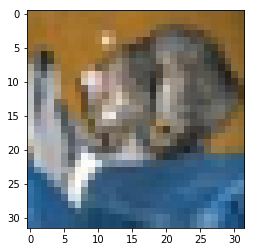

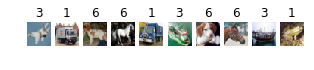

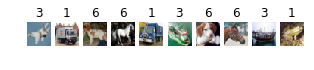

In [5]:
# Display_images
i=10
lsp.view_image(data[0])
lsp.view_images(data[i:(i+10)], cls[i:(i+10)])
lsp.view_images(data[i:(i+10)], cls[i:(i+10)])

####  Visualisation

In [6]:
## For visualisation of data : Creating varaible to hold the images
embedding_var =tf.placeholder(tf.float32, [None,img_rows,img_cols, channel], name = "input")
x_image = tf.summary.image('input', tf.reshape(embedding_var, [-1, 32, 32, 3]), 10)

#### Running a session

In [7]:
##  Start a session and run variables
sess = tf.InteractiveSession()
init = tf.global_variables_initializer() # Initialize the variables (i.e. assign their default value)
sess.run(init)

embedded_writer = tf.summary.FileWriter('./logdir', sess.graph) # Creating summary writer class instance
image_event=sess.run(x_image, feed_dict={embedding_var:lsp.reshape_rgb_as_tensor(data[0:vis_num])})
embedded_writer.add_summary(image_event,custom_global_step) # Writing summary to the event file

#### Tensorboard visualisation

In [8]:
# Checking the items in the log directory
!tensorboard --inspect --logdir='./logdir'

Processing event files... (this can take a few minutes)

Found event files in:
./logdir

These tags are in ./logdir:
audio -
histograms -
images
   input_1/image/0
   input_1/image/1
   input_1/image/2
   input_1/image/3
   input_1/image/4
   input_1/image/5
   input_1/image/6
   input_1/image/7
   input_1/image/8
   input_1/image/9
scalars -
tensor -

Event statistics for ./logdir:
audio -
graph
   first_step           0
   last_step            0
   max_step             0
   min_step             0
   num_steps            1
   outoforder_steps     []
histograms -
images
   first_step           1
   last_step            1
   max_step             1
   min_step             1
   num_steps            1
   outoforder_steps     []
scalars -
sessionlog:checkpoint -
sessionlog:start -
sessionlog:stop -
tensor -



In [9]:
# Running tensorflow
print('If on windows system go to: http://localhost:6006')
!tensorboard --logdir='./logdir'

If on windows system go to: http://localhost:6006
ERROR:tensorflow:TensorBoard attempted to bind to port 6006, but it was already in use
TensorBoard attempted to bind to port 6006, but it was already in use


#### Finally clossing the current sessions : Save the models before this 